# Micki Rhen HW1 - Playing around with seaborn

So, 41% is not great, and it's driving me a little bit crazy.  I poked around online and found some recommendations to tackle it one political party at a time.  I'm not quite sure how to do that and put it all back together again and get a ranking.  But, I though I would at least do a little more data exploration.  I found a fun seaborn pairplot I want to try, so here goes...

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

## Here we go... again lol

Just going to do the upfront basics and then run some pair plots

### Data prep

In [4]:
tax_df = pd.read_csv("./data/raw/TaxInfo.csv")

In [5]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


From the 'aap_hw1_s21_sklearn.ipynb' file we know the following information about the fields:

* `HHI` - household income
* `HHDL` - household debt level
* `Married` - categorical with a few levels
* `CollegGrads` - number of college grads in the household
* `AHHAge` - average age of people in the household
* `Cars` - number of cars in the household
* `Filed_2017` - 1 means they filed a tax return with the IRS for 2017
* `Filed_2016` - 1 means they filed a tax return with the IRS for 2016
* `Filed_2015` - 1 means they filed a tax return with the IRS for 2015
* `PoliticalParty` - categorical with 3 levels

'Political party' is categorical. 'Married' is categorical as well but read into our data frame as an integer.  My guess is that we have an entry for married, and blank for not, but we better take a quick look at some of the actual data to be sure...

In [6]:
tax_df.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,Democrat
1,64756,-507342,2,3,68,3,1,0,0,Independent
2,115435,521290,1,3,81,2,0,1,0,Republican
3,99454,251829,2,1,52,4,1,0,0,Republican
4,157274,-472337,0,1,28,1,1,0,1,Independent


'Filed_2017', 'Filed_2016', and 'Filed_2015' are actually categorical variables as well, but they have already been converted from strings to numbers, so I am not going to worry about them right now

In [13]:
cols_to_keep = tax_df.columns.tolist()
cols_to_keep

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015',
 'PoliticalParty']

In [14]:
tax_df = tax_df.loc[:, cols_to_keep]
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


### Data preprocessing - variable type lists

Create a list of numeric columns and categorical columns to facilitate preprocessing.

Split our data into numerical & categorical variable lists

In [19]:
categorical_cols = tax_df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = tax_df.select_dtypes(include=['number']).columns.tolist()

all_cols = tax_df.columns.tolist()


In [20]:
numeric_cols

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [21]:
categorical_cols

['PoliticalParty']

### Some pairplots using Seaborn

Ok, let's use pairplot to look at this data in a different way...

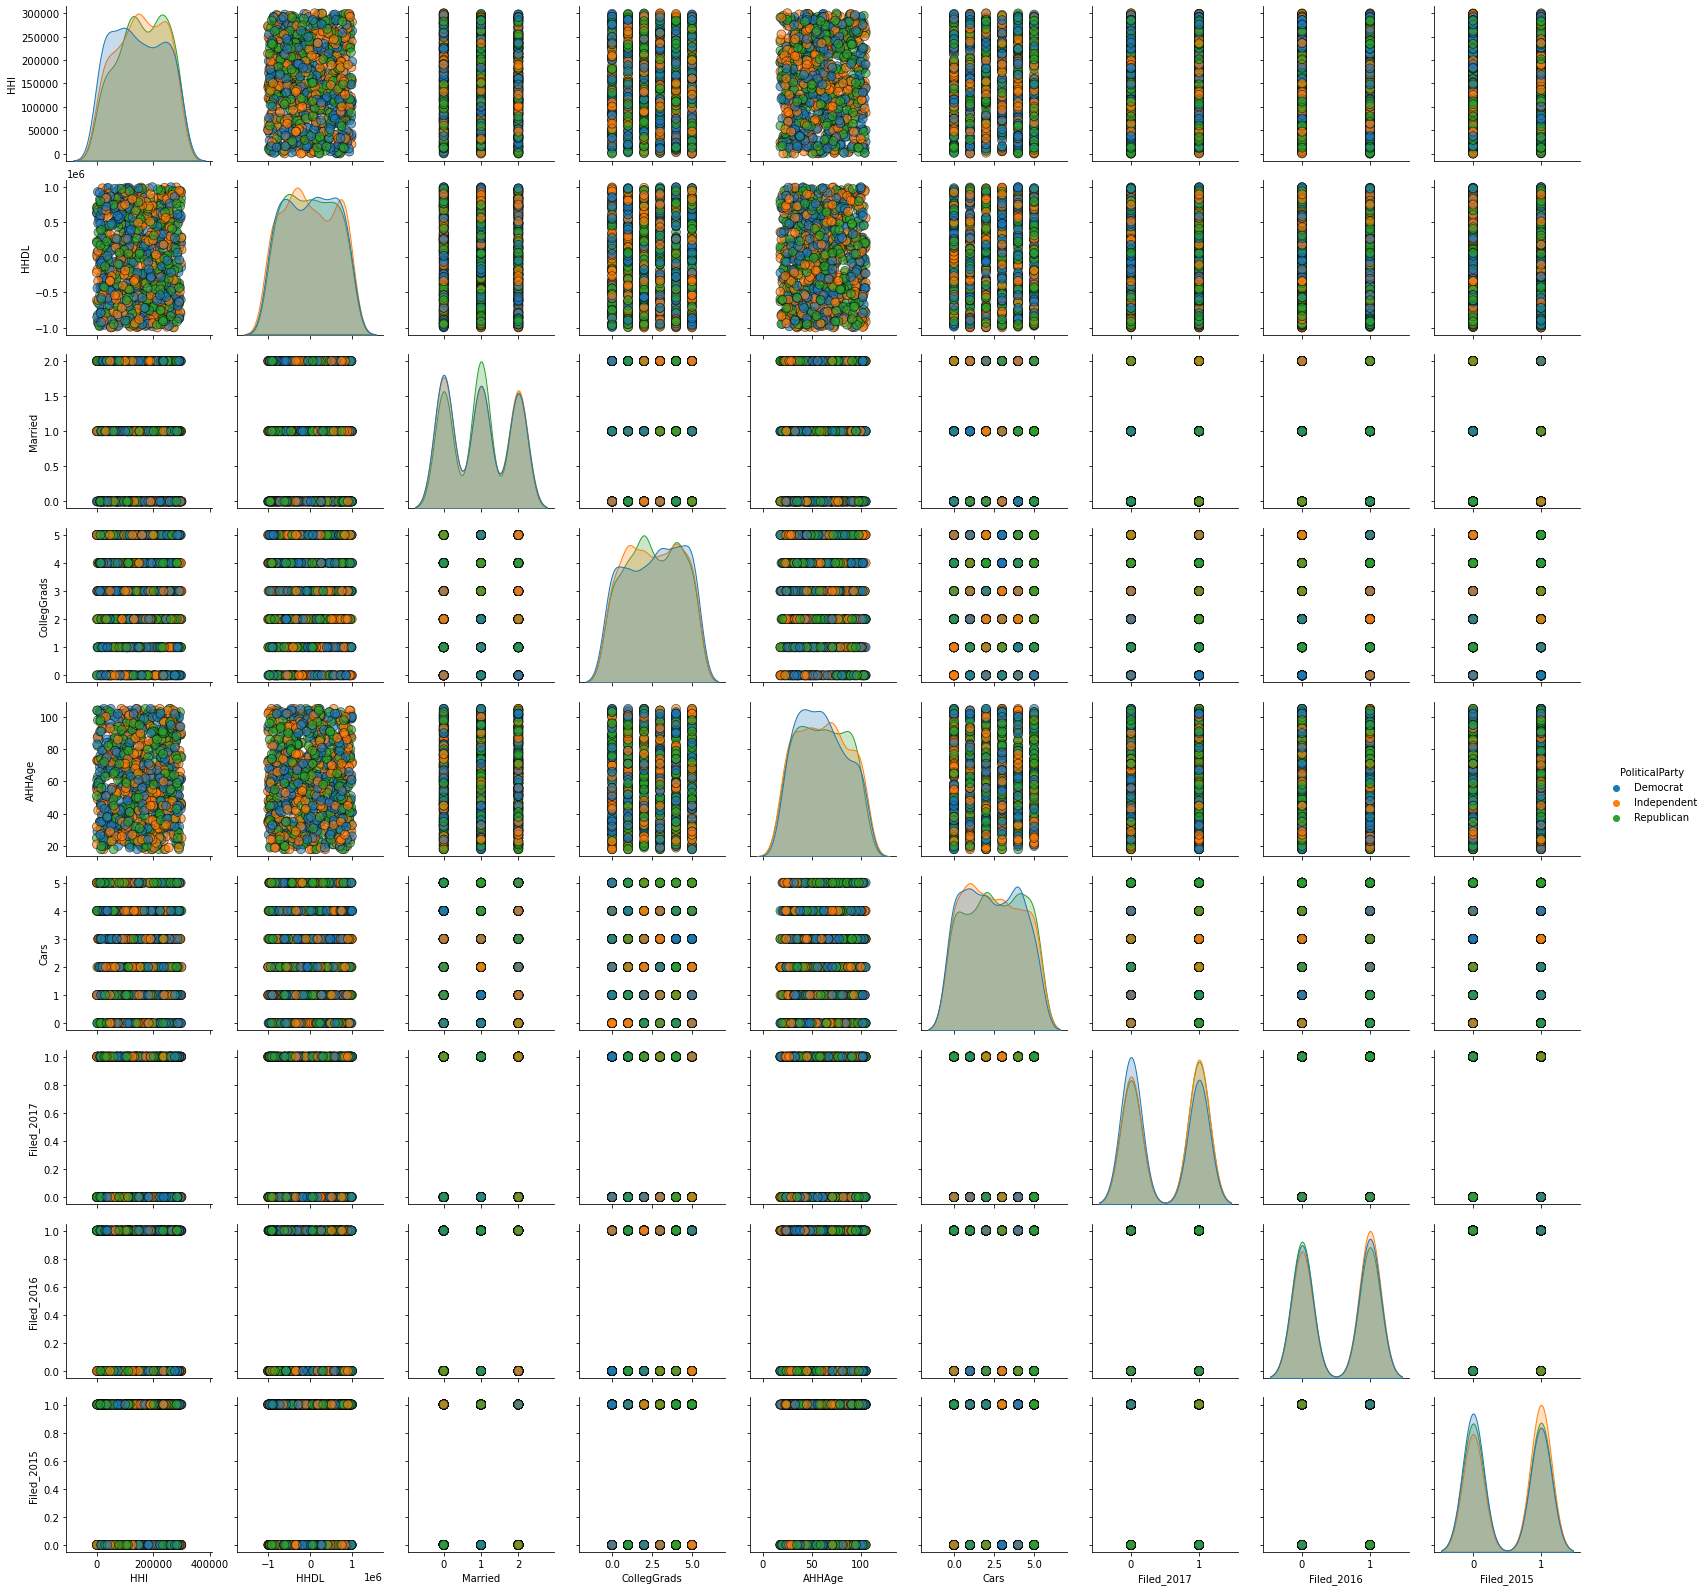

In [9]:

sns.pairplot(tax_df, hue = 'PoliticalParty', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

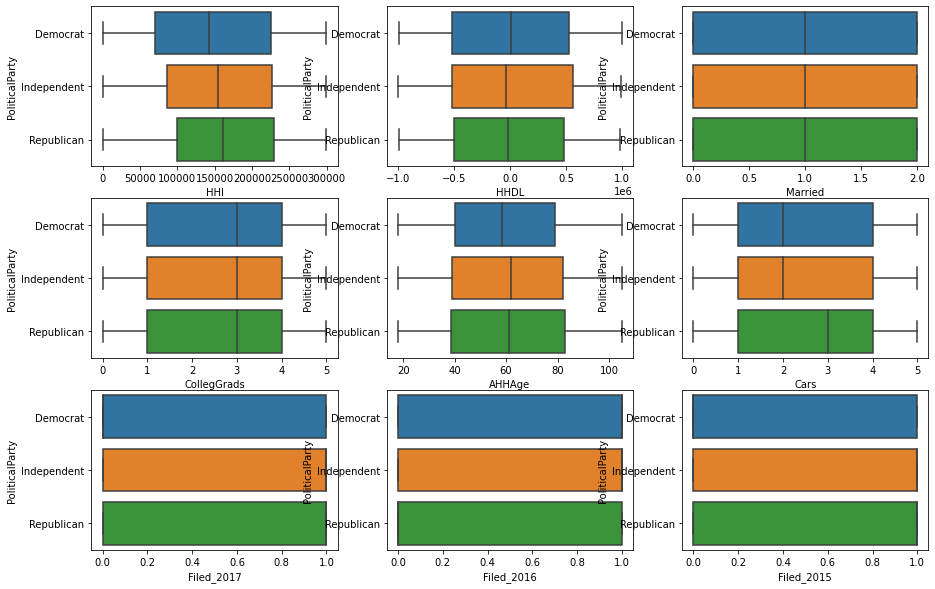

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(numeric_cols, ax.flatten()):
    sns.boxplot(x=var, y='PoliticalParty', data=tax_df, ax=subplot)

Well, nothing is jumping out at me as being particularly strong in predicting political party.  But the journey was fun lol